# Section 3.5 — Null hypothesis significance testing

This notebook contains the code examples from [Section 3.5 Null hypothesis significance testing]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from plot_helpers import plot_pdf
from plot_helpers import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/NHST"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
#######################################################

## Definitions

## Hypothesis testing as a decision rule

## NHST procedure

## Example 1: detect kombuncha volume deviation from theory

## Example 3: comparison of East vs. West electricity prices 

## Explanations

### Probability models for NHST

### Unique value proposition of NHST

### One-sided and two-sided rejection regions

Saved figure to figures/stats/NHST/panel_rejection_regions_left_twotailed_right.pdf
Saved figure to figures/stats/NHST/panel_rejection_regions_left_twotailed_right.png


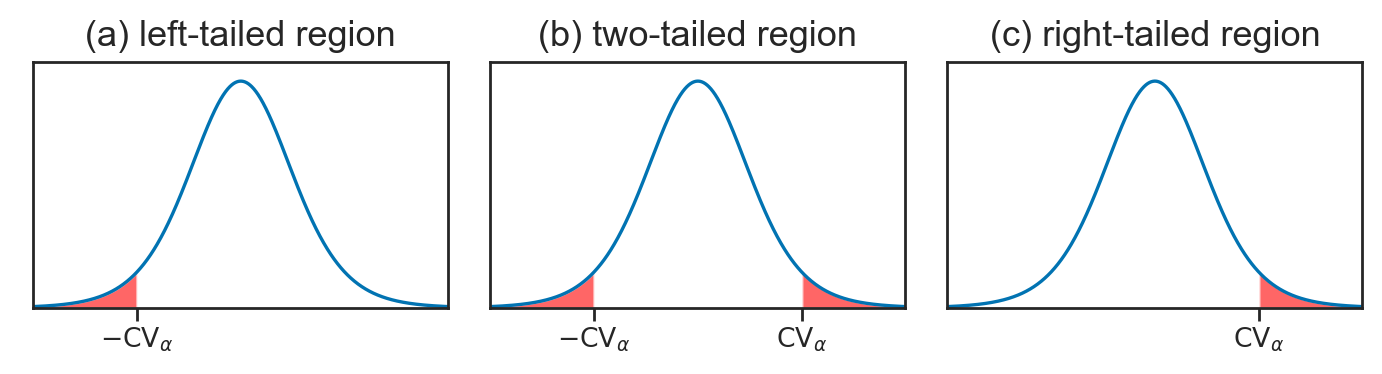

In [6]:
filename = os.path.join(DESTDIR, "panel_rejection_regions_left_twotailed_right.pdf")
    
from scipy.stats import t as tdist
rvT = tdist(9)

xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)

with plt.rc_context({"figure.figsize":(7,2)}), sns.axes_style("ticks"):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)


    # LEFT
    title = '(a) left-tailed region'
    ax1.set_title(title, fontsize=13) #, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax1)
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(0, 0.42)
    ax1.set_xticks([-2])
    ax1.set_xticklabels([])
    ax1.set_yticks([])

    # highlight the left tail
    mask = (xs < -2)
    ax1.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax1.text(-2, -0.03, r"$-\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")



    # TWO-TAILED
    title = '(b) two-tailed region'
    ax2.set_title(title, fontsize=13)#, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax2)
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(0, 0.42)
    ax2.set_xticks([-2,2])
    ax2.set_xticklabels([])
    ax2.set_yticks([])

    # highlight the left and right tails
    mask = (xs < -2)
    ax2.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax2.text(-2, -0.03, r"$-\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")
    mask = (xs > 2)
    ax2.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax2.text(2, -0.03, r"$\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


    # RIGHT
    title = '(c) right-tailed region'
    ax3.set_title(title, fontsize=13)#, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax3)
    ax3.set_xlim(-4, 4)
    ax3.set_ylim(0, 0.42)
    ax3.set_xticks([2])
    ax3.set_xticklabels([])
    ax3.set_yticks([])

    # highlight the right tail
    mask = (xs > 2)
    ax3.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax3.text(2, -0.03, r"$\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")

savefigure(fig, filename)

### Statistical design calculations

#### Sample size calculation

In [7]:
import pingouin as pg
from statsmodels.stats import power

# deisng parameters  
EFFECT_SIZE = 0.5
ALPHA = 0.05 
POWER = 0.8

# using statsmodels
power_analysis = power.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=EFFECT_SIZE, 
                                         power=POWER, 
                                         alpha=ALPHA)

print(f'Required sample size (statsmodels): {sample_size:.0f}')

# using pingouin
sample_size = pg.power_ttest(d=EFFECT_SIZE, 
                             alpha=ALPHA, 
                             power=POWER, 
                             n=None)

print(f'Required sample size (pingouin): {sample_size:.0f}')

Required sample size (statsmodels): 64
Required sample size (pingouin): 64


/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


#### Understanding the design formula

In [9]:
import statsmodels
statsmodels.__version__

'0.13.5'

## Discussion

### Different types of power

### Different types of effect size size

### Limitations of NHST

### Perils of the NHST procedure


## Exercises

## Links